In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import seaborn as sns
%matplotlib inline


Hypothesis:

Which cab company has the higher profit according to the years?

Which cab company has the most profit?

How the genders distribute according to cab companies?

Which payment method is mostly used?

How the cabs 	dissociate according to their colors , with observing their profits according to cities?

How the payment method distribute over cab companies?

Does the profit increase over years in cab industry?

How does the charged price change over KM travelled?


In [3]:
import pandas as pd

url_data = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')

Cab_Data= pd.read_csv(url_data)

Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [131]:
Cab_Data.info

<bound method DataFrame.info of         Transaction ID  Date of Travel  ... Price Charged Cost of Trip
0             10000011           42377  ...        370.95     313.6350
1             10000012           42375  ...        358.52     334.8540
2             10000013           42371  ...        125.20      97.6320
3             10000014           42376  ...        377.40     351.6020
4             10000015           42372  ...        114.62      97.7760
...                ...             ...  ...           ...          ...
359387        10440101           43108  ...         69.24      63.3600
359388        10440104           43104  ...        113.75     106.8480
359389        10440105           43105  ...        437.07     349.6500
359390        10440106           43105  ...        146.19     114.0480
359391        10440107           43102  ...        191.58     177.6192

[359392 rows x 7 columns]>

In [4]:
url_data2 = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')

City= pd.read_csv(url_data2)

City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [73]:
City.dtypes

City          object
Population    object
Users         object
dtype: object

In [76]:
City['Population'] = [x.replace(',','') for x in City['Population']]
City['Users'] = [x.replace(',','') for x in City['Users']]
City['Population'] = City['Population'].astype(float)
City['Users'] = City['Users'].astype(float)
City.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [5]:
url_data3 = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')

Customer_ID= pd.read_csv(url_data3)

Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [78]:
Customer_ID.dtypes

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object

In [6]:

url_data4 = (r'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')

Transaction_ID= pd.read_csv(url_data4)

Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [7]:
numberofrows_1, numberofcolumns_1 = Transaction_ID.shape
print("There are {} rows and {} columns".format(numberofrows_1, numberofcolumns_1)+" in our Transaction_ID Dataset.")

There are 440098 rows and 3 columns in our Transaction_ID Dataset.


In [8]:
numberofrows_2, numberofcolumns_2 = City.shape
print("There are {} rows and {} columns".format(numberofrows_2, numberofcolumns_2)+" in our City Dataset.")

There are 20 rows and 3 columns in our City Dataset.


In [9]:
numberofrows_3, numberofcolumns_3 = Customer_ID.shape
print("There are {} rows and {} columns".format(numberofrows_3, numberofcolumns_3)+" in our Customer_ID Dataset.")

There are 49171 rows and 4 columns in our Customer_ID Dataset.


In [10]:
numberofrows_4, numberofcolumns_4 = Cab_Data.shape
print("There are {} rows and {} columns".format(numberofrows_4, numberofcolumns_4)+" in our Cab_Data Dataset.")

There are 359392 rows and 7 columns in our Cab_Data Dataset.


In [11]:
result_merged= pd.merge(left=Transaction_ID, right=Customer_ID, left_on='Customer ID', right_on='Customer ID')
result_merged.head(10)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237
5,10324737,27703,Cash,Male,27,9237
6,10395626,27703,Card,Male,27,9237
7,10000013,28712,Cash,Male,53,11242
8,10079404,28712,Card,Male,53,11242
9,10186994,28712,Card,Male,53,11242


In [12]:
result= pd.merge(left=Transaction_ID, right=Cab_Data , left_on='Transaction ID', right_on='Transaction ID')
result.head(10)

,Transaction ID,Customer ID,Payment_Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776
5,10000016,27318,Cash,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024
6,10000017,33788,Card,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200
7,10000018,34106,Card,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890
8,10000019,59799,Cash,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880
9,10000020,57982,Cash,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256


In [13]:
result_all= pd.merge(left=result, right=result_merged, left_on='Transaction ID', right_on='Transaction ID')
result_all.head(10)

,Transaction ID,Customer ID_x,Payment_Mode_x,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID_y,Payment_Mode_y,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536
5,10000016,27318,Cash,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.024,27318,Cash,Male,25,13984
6,10000017,33788,Card,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.200,33788,Card,Male,23,23788
7,10000018,34106,Card,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.890,34106,Card,Male,19,19980
8,10000019,59799,Cash,42381,Pink Cab,BOSTON MA,14.40,191.61,146.880,59799,Cash,Male,33,19271
9,10000020,57982,Cash,42375,Pink Cab,BOSTON MA,10.89,156.98,113.256,57982,Cash,Male,57,5068


**DATA** **CLEANING**

In [65]:
from datetime import datetime, timedelta

In [66]:
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [ ]:
result_all['Date of Travel']=result_all['Date of Travel'].apply(lambda x:to_date_format(x))


In [70]:
result_all=result_all.sort_values(by=['Date of Travel'])
result_all=result_all.reset_index(drop= True )

In [71]:
result_all.head(10)

,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,company
0,10001219,37298,Cash,2016-01-01,Yellow Cab,SEATTLE WA,29.90,871.63,419.796,Male,49,22669,451.834,1.0
1,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.300,Male,31,23320,194.950,1.0
2,10001014,47687,Card,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.200,Male,25,16088,518.220,1.0
3,10000592,4535,Card,2016-01-01,Yellow Cab,CHICAGO IL,9.63,240.10,127.116,Male,39,19199,112.984,1.0
4,10000163,22557,Cash,2016-01-01,Pink Cab,PHOENIX AZ,4.44,71.57,48.840,Male,38,8808,22.730,0.0
5,10000164,22469,Card,2016-01-01,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,Male,37,4378,24.375,0.0
6,10000588,5211,Cash,2016-01-01,Yellow Cab,CHICAGO IL,12.00,275.99,156.960,Male,35,10393,119.030,1.0
7,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.084,Male,39,8926,122.066,0.0
8,10001025,20472,Cash,2016-01-01,Yellow Cab,SAN DIEGO CA,39.90,1019.44,497.952,Male,40,12616,521.488,1.0
9,10000564,5867,Card,2016-01-01,Yellow Cab,CHICAGO IL,36.30,761.20,483.516,Male,36,2103,277.684,1.0


In [15]:
result_all.columns

Index(['Transaction ID', 'Customer ID_x', 'Payment_Mode_x', 'Date of Travel',
       'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip',
       'Customer ID_y', 'Payment_Mode_y', 'Gender', 'Age',
       'Income (USD/Month)'],
      dtype='object')

In [16]:
result_all.isnull().sum().sum()

0

ADD THIS TO PRESENTATION


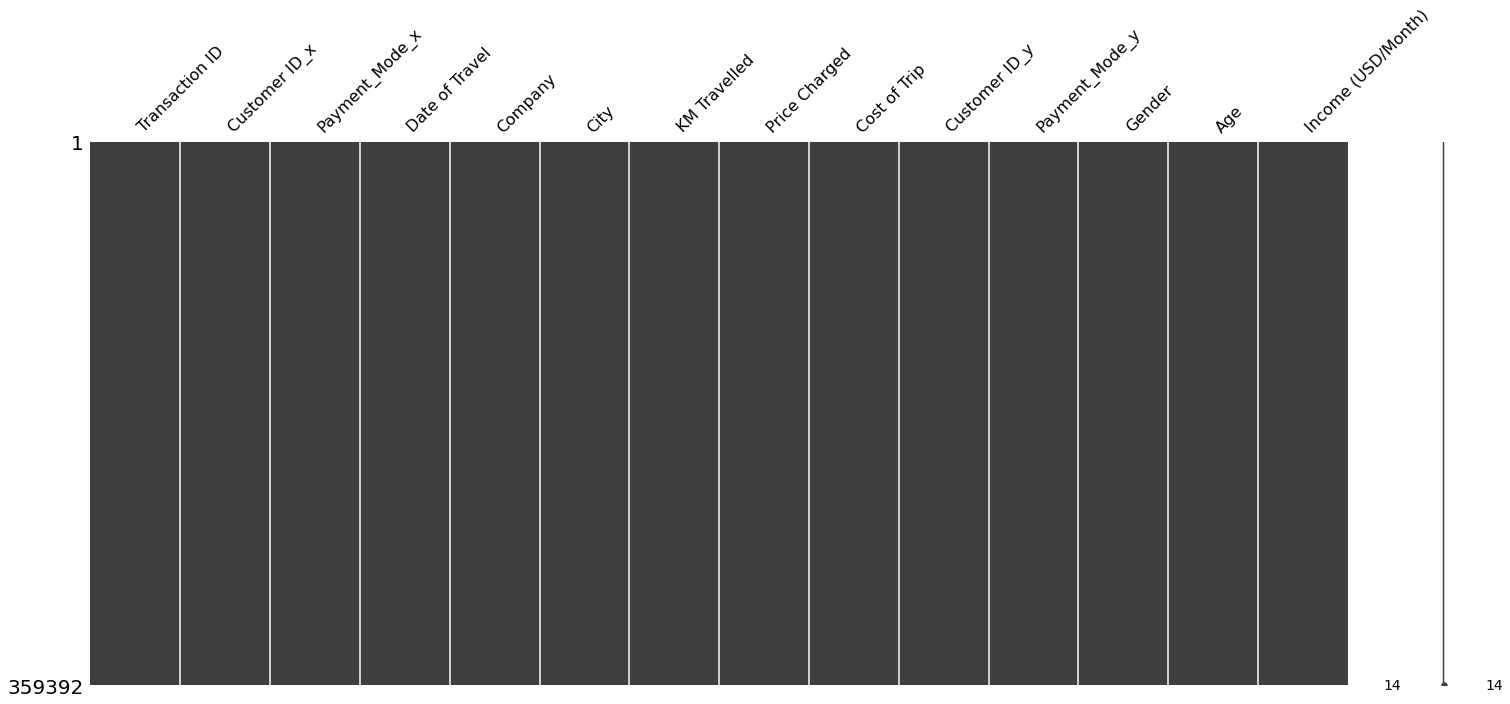

In [17]:
import missingno as msno
%matplotlib inline
msno.matrix(result_all)

No missing attributes in our datasets.

In [18]:
print('\nNumber of missing values by columns :') 
result_all.isnull().sum()


Number of missing values by columns :


Transaction ID        0
Customer ID_x         0
Payment_Mode_x        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID_y         0
Payment_Mode_y        0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [19]:
result_all.drop(["Payment_Mode_y", "Customer ID_y"],axis=1,inplace=True)
result_all .head(2)

,Transaction ID,Customer ID_x,Payment_Mode_x,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237


In [20]:
result_all.rename(columns={"Customer ID_x":"Customer ID","Payment_Mode_x":"Payment Mode"}, inplace=True)
result_all.head(5)

,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536


In [26]:
result_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment Mode        359392 non-null  object 
 3   Date of Travel      359392 non-null  int64  
 4   Company             359392 non-null  object 
 5   City                359392 non-null  object 
 6   KM Travelled        359392 non-null  float64
 7   Price Charged       359392 non-null  float64
 8   Cost of Trip        359392 non-null  float64
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 35.6+ MB


**REMOVING** **OUTLIERS**

In [42]:
from scipy import stats

def drop_numerical_outliers(df, z_thresh=3):
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)

In [43]:
drop_numerical_outliers(result_all)

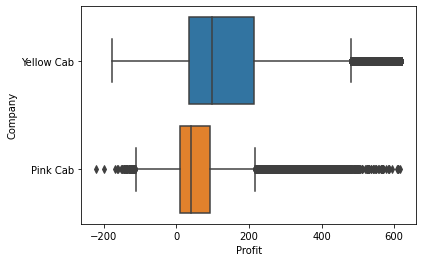

In [86]:
import seaborn as sns
sns.boxplot(data = result_all, y = 'Company', x = "Profit")

In [ ]:
no spesific outliers here.

In [28]:
result_all['Company'].value_counts()

Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64

yellow cab useage is more common than pink cab usage.

In [29]:
result_all['KM Travelled'].value_counts()

33.60    1536
24.00    1080
22.80    1075
35.70    1069
16.80    1065
         ... 
29.58     308
12.24     306
3.51      301
39.39     300
21.84     293
Name: KM Travelled, Length: 874, dtype: int64

In [30]:
result_all['Payment Mode'].value_counts()

Card    215504
Cash    143888
Name: Payment Mode, dtype: int64

Customers used card more as paymnet method.

In [31]:
result_all['Gender'].value_counts()

Male      205912
Female    153480
Name: Gender, dtype: int64

Gender male is more frequent.

In [32]:
result_all['Age'].value_counts(ascending=True)

65     3379
55     3442
57     3473
62     3530
53     3641
48     3700
44     3725
63     3733
56     3742
60     3775
52     3784
54     3810
43     3823
41     3852
64     3908
46     3918
51     3931
42     3970
59     4068
47     4087
50     4089
58     4107
49     4158
45     4248
61     4361
35    10555
29    10675
18    10846
38    10906
31    10930
36    11054
37    11086
24    11151
28    11163
30    11165
21    11431
33    11457
40    11536
19    11591
26    11655
22    11796
39    11798
34    11825
32    11959
25    11973
27    12030
20    12229
23    12327
Name: Age, dtype: int64

The age for cab usage is most frequent at age 20-35,elders don't use cab as much as them.

In [33]:
result_all['Income (USD/Month)'].value_counts()

20884    134
8899     133
22525    129
16512    121
16137    118
        ... 
23800      1
23943      1
11657      1
4056       1
14285      1
Name: Income (USD/Month), Length: 22725, dtype: int64

In [58]:
result_all['City'].value_counts()

NEW YORK NY       93014
CHICAGO IL        56621
LOS ANGELES CA    47981
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20485
SILICON VALLEY     8434
SEATTLE WA         7993
ATLANTA GA         7544
DALLAS TX          6913
MIAMI FL           6414
AUSTIN TX          4876
ORANGE COUNTY      3941
DENVER CO          3811
NASHVILLE TN       3007
SACRAMENTO CA      2364
PHOENIX AZ         2063
TUCSON AZ          1928
PITTSBURGH PA      1303
Name: City, dtype: int64

In [34]:
profit=result_all['Price Charged']-result_all['Cost of Trip']
result_all['Profit']= profit

In [35]:
correlations = result_all.corr()
correlations

,Transaction ID,Customer ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Profit
Transaction ID,1.000000,-0.016912,0.993030,-0.001429,-0.052902,-0.003462,-0.001267,-0.001570,-0.087130
Customer ID,-0.016912,1.000000,-0.017653,0.000389,-0.177324,0.003077,-0.004735,-0.013608,-0.306527
Date of Travel,0.993030,-0.017653,1.000000,-0.001621,-0.055559,-0.004484,-0.001346,-0.001368,-0.090672
KM Travelled,-0.001429,0.000389,-0.001621,1.000000,0.835753,0.981848,-0.000369,-0.000544,0.462768
Price Charged,-0.052902,-0.177324,-0.055559,0.835753,1.000000,0.859812,-0.003084,0.003228,0.864154
Cost of Trip,-0.003462,0.003077,-0.004484,0.981848,0.859812,1.000000,-0.000189,-0.000633,0.486056
Age,-0.001267,-0.004735,-0.001346,-0.000369,-0.003084,-0.000189,1.000000,0.003907,-0.005093
Income (USD/Month),-0.001570,-0.013608,-0.001368,-0.000544,0.003228,-0.000633,0.003907,1.000000,0.006148
Profit,-0.087130,-0.306527,-0.090672,0.462768,0.864154,0.486056,-0.005093,0.006148,1.000000


Proift is obviously correlated to price charged,cost of trip
 km travelled,

In [36]:
print(correlations["Profit"])

Transaction ID       -0.087130
Customer ID          -0.306527
Date of Travel       -0.090672
KM Travelled          0.462768
Price Charged         0.864154
Cost of Trip          0.486056
Age                  -0.005093
Income (USD/Month)    0.006148
Profit                1.000000
Name: Profit, dtype: float64


In [37]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
result_all["company"] = ord_enc.fit_transform(result_all[["Company"]])
result_all.head(5)


,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,company
0,10000011,29290,Card,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,Male,28,10813,57.315,0.0
1,10000012,27703,Card,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,Male,27,9237,23.666,0.0
2,10000013,28712,Cash,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,Male,53,11242,27.568,0.0
3,10000014,28020,Cash,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,Male,23,23327,25.798,0.0
4,10000015,27182,Card,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,Male,33,8536,16.844,0.0


In [53]:
result_all2=result_all.sample(n = 250)

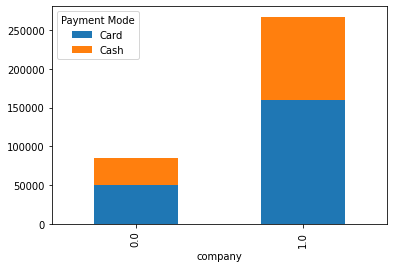

In [60]:
import matplotlib.pyplot as plt
import pandas as pd

result_all.groupby(['company','Payment Mode']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

1.0 is for yellow cab ,and 0.0 is for pink cab company. Card used more than cash.

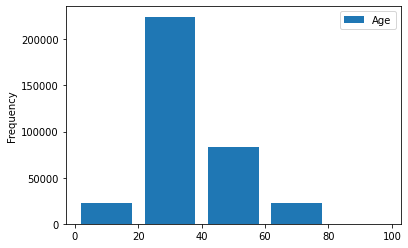

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

result_all[['Age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

Usage of cab is more common in the age gap 20-40.

Text(0.5, 0, 'Gender')

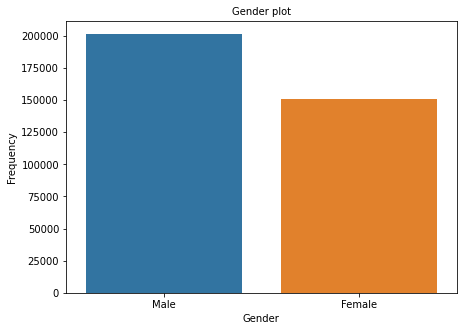

In [91]:
plt.figure(figsize=(7,5))
sns.countplot(data=result_all, x="Gender")
plt.title("Gender plot", fontsize=10)
plt.ylabel('Frequency')
plt.xlabel('Gender')

In [ ]:
Mostly males uses cab.

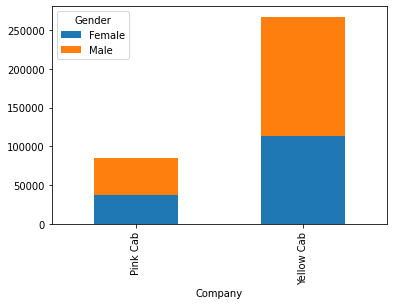

In [126]:
import matplotlib.pyplot as plt
import pandas as pd

result_all.groupby(['Company','Gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Males are more common in yellow cab and there is not a significant difference between gender in pink cab.

In [95]:
result_all['Year of Travel'] = result_all['Date of Travel'].dt.year

In [96]:
result_all.head(10)

,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,company,Year of Travel
0,10001219,37298,Cash,2016-01-01,Yellow Cab,SEATTLE WA,29.90,871.63,419.796,Male,49,22669,451.834,1.0,2016
1,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.300,Male,31,23320,194.950,1.0,2016
2,10001014,47687,Card,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.200,Male,25,16088,518.220,1.0,2016
3,10000592,4535,Card,2016-01-01,Yellow Cab,CHICAGO IL,9.63,240.10,127.116,Male,39,19199,112.984,1.0,2016
4,10000163,22557,Cash,2016-01-01,Pink Cab,PHOENIX AZ,4.44,71.57,48.840,Male,38,8808,22.730,0.0,2016
5,10000164,22469,Card,2016-01-01,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,Male,37,4378,24.375,0.0,2016
6,10000588,5211,Cash,2016-01-01,Yellow Cab,CHICAGO IL,12.00,275.99,156.960,Male,35,10393,119.030,1.0,2016
7,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.084,Male,39,8926,122.066,0.0,2016
8,10001025,20472,Cash,2016-01-01,Yellow Cab,SAN DIEGO CA,39.90,1019.44,497.952,Male,40,12616,521.488,1.0,2016
9,10000564,5867,Card,2016-01-01,Yellow Cab,CHICAGO IL,36.30,761.20,483.516,Male,36,2103,277.684,1.0,2016


In [97]:
yellowcab= result_all[result_all.Company.isin(['Yellow Cab'])]
print(yellowcab.shape)
yellowcab.head()


(267439, 15)


,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,company,Year of Travel
0,10001219,37298,Cash,2016-01-01,Yellow Cab,SEATTLE WA,29.90,871.63,419.796,Male,49,22669,451.834,1.0,2016
1,10000600,3363,Cash,2016-01-01,Yellow Cab,CHICAGO IL,23.75,531.25,336.300,Male,31,23320,194.950,1.0,2016
2,10001014,47687,Card,2016-01-01,Yellow Cab,SACRAMENTO CA,38.00,1065.42,547.200,Male,25,16088,518.220,1.0,2016
3,10000592,4535,Card,2016-01-01,Yellow Cab,CHICAGO IL,9.63,240.10,127.116,Male,39,19199,112.984,1.0,2016
6,10000588,5211,Cash,2016-01-01,Yellow Cab,CHICAGO IL,12.00,275.99,156.960,Male,35,10393,119.030,1.0,2016


In [98]:
pinkcab= result_all[result_all.Company.isin(['Pink Cab'])]
print(pinkcab.shape)
pinkcab.head()

(84682, 15)


,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,company,Year of Travel
4,10000163,22557,Cash,2016-01-01,Pink Cab,PHOENIX AZ,4.44,71.57,48.840,Male,38,8808,22.730,0.0,2016
5,10000164,22469,Card,2016-01-01,Pink Cab,PHOENIX AZ,8.55,114.15,89.775,Male,37,4378,24.375,0.0,2016
7,10000171,20687,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,14.28,269.15,147.084,Male,39,8926,122.066,0.0,2016
14,10000182,18418,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,2.36,47.89,23.600,Male,39,13112,24.290,0.0,2016
17,10000187,18817,Cash,2016-01-01,Pink Cab,SAN DIEGO CA,23.80,485.21,252.280,Male,40,5038,232.930,0.0,2016


In [99]:
result_all.sort_values('Year of Travel').head()

,Transaction ID,Customer ID,Payment Mode,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Gender,Age,Income (USD/Month),Profit,company,Year of Travel
0,10001219,37298,Cash,2016-01-01,Yellow Cab,SEATTLE WA,29.90,871.63,419.7960,Male,49,22669,451.8340,1.0,2016
70349,10089452,4453,Cash,2016-10-13,Yellow Cab,CHICAGO IL,4.52,68.75,62.9184,Male,30,2289,5.8316,1.0,2016
70348,10089171,58095,Cash,2016-10-13,Yellow Cab,BOSTON MA,18.36,313.37,231.3360,Female,48,6673,82.0340,1.0,2016
70347,10090306,648,Cash,2016-10-13,Yellow Cab,NEW YORK NY,17.28,339.98,211.5072,Male,39,2287,128.4728,1.0,2016
70346,10089444,3135,Cash,2016-10-13,Yellow Cab,CHICAGO IL,11.90,180.99,149.9400,Male,53,11458,31.0500,1.0,2016


In [113]:
pinkcab_profit=pinkcab.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
pinkcab_profit.head(3)

Profit
Company  Year of Travel             
Pink Cab 2016            1733832.342
         2017            2004750.889
         2018            1545756.488

Pink cab get the most profit in 2017.

In [114]:
pinkcab_profit['Profit'].sum(axis=0)


5284339.719000008

Total profit of pink cab.

In [107]:
yellowcab_profit=yellowcab.groupby(['Company', 'Year of Travel']).Profit.sum().to_frame('Profit')
yellowcab_profit.head(3)

Profit
Company    Year of Travel              
Yellow Cab 2016            1.204760e+07
           2017            1.414065e+07
           2018            1.243107e+07

Also yellow cab got the most profit in 2017.

In [112]:
yellowcab_profit['Profit'].sum(axis=0)

38619326.47319999

Yellow cab's total profit is much higher than pink cab.

## **Average profits per City**


Text(0.5, 1.0, 'Yellow Cab Profit distribution according to Cities')

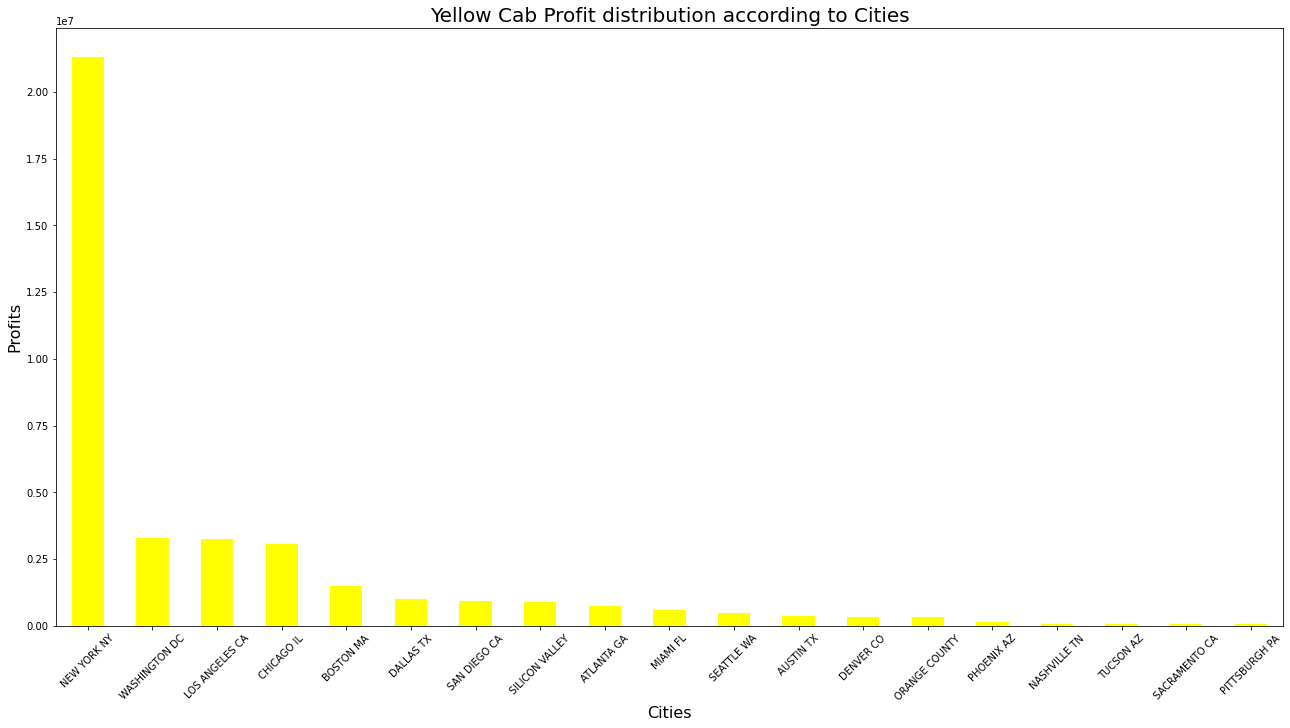

In [124]:
grp= yellowcab.groupby('City').Profit.sum()
grp= pd.DataFrame(grp)
grp = grp.sort_values(by='Profit', ascending= False )
grp.head()

plt.figure(figsize=(22,11))
fig= grp.Profit.plot.bar(color = 'yellow',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('Yellow Cab Profit distribution according to Cities',fontsize=20)


Text(0.5, 1.0, 'PinkCab Profit distribution according to Cities')

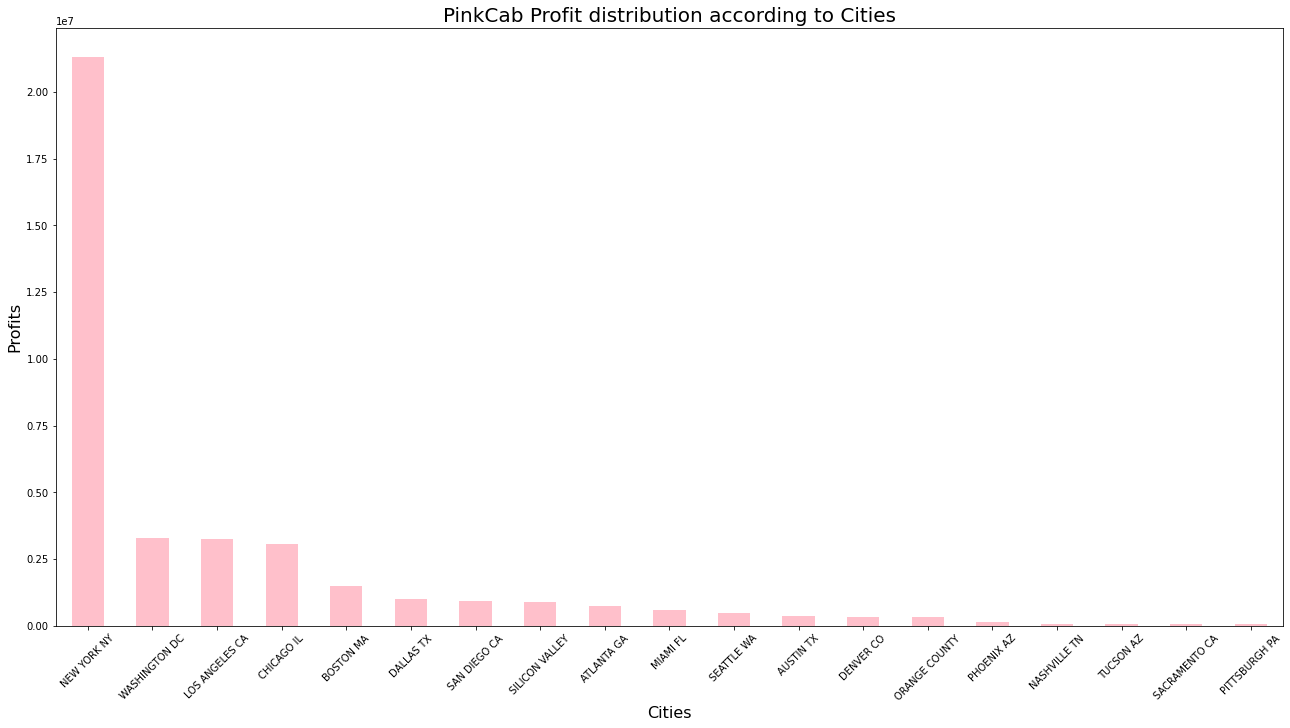

In [123]:
grp2= yellowcab.groupby('City').Profit.sum()
grp2= pd.DataFrame(grp2)
grp2 = grp2.sort_values(by='Profit', ascending= False )
grp2.head()

plt.figure(figsize=(22,11))
fig= grp2.Profit.plot.bar(color = 'pink',linewidth=1.5)
plt.xticks(rotation=45)

plt.ylabel('Profits', fontsize=16)
plt.xlabel('Cities', fontsize=16)
plt.title('PinkCab Profit distribution according to Cities',fontsize=20)


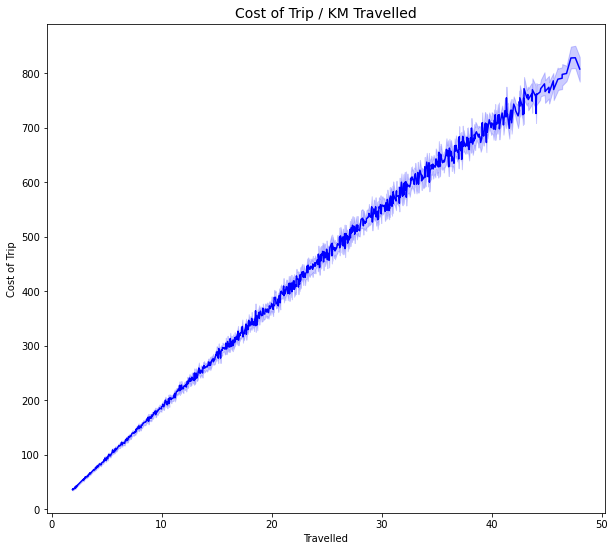

In [128]:
plt.figure(figsize=(10,9))
sns.lineplot(data=result_all, x="KM Travelled",y='Price Charged', color= 'blue')
plt.title('Cost of Trip / KM Travelled', fontsize=14)
plt.xlabel('Travelled')
plt.ylabel('Price Charged for Trip')
plt.show()

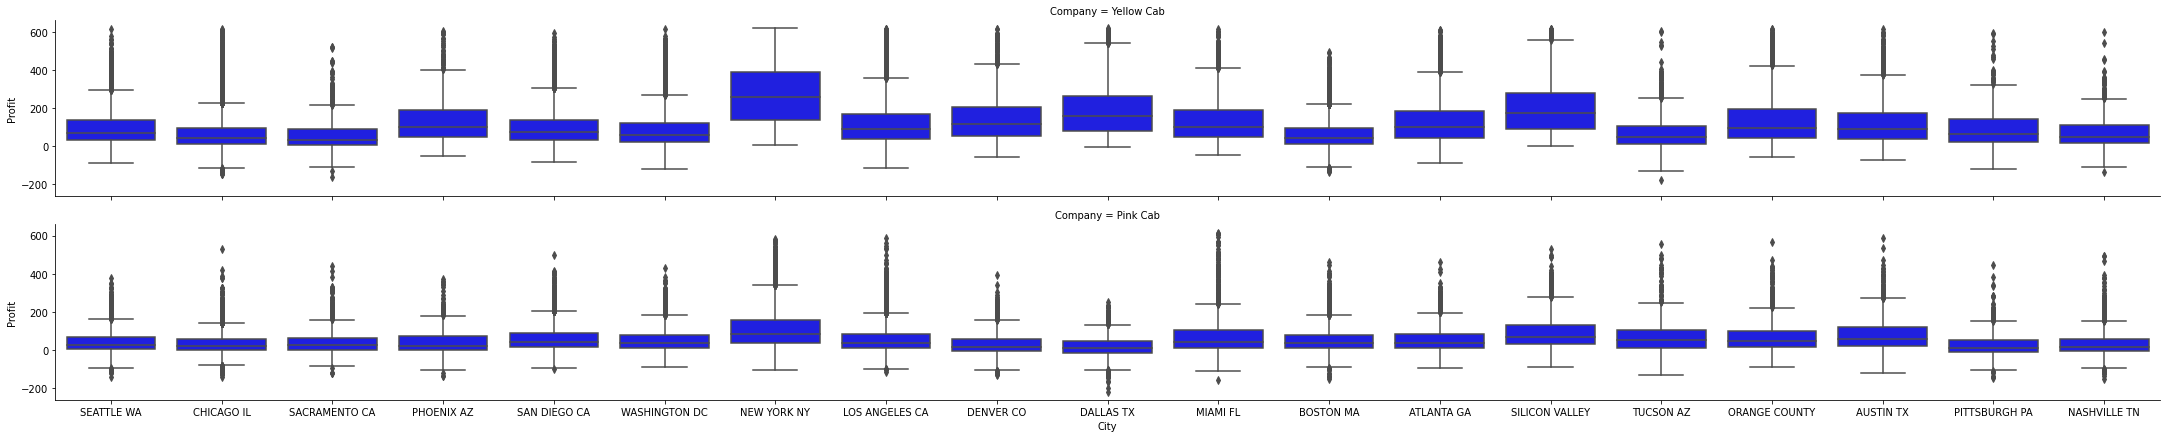

In [130]:
sns.catplot(
    data=result_all,
    x='City',
    y='Profit',
    row='Company',
    kind='box',
    height=3, 
    aspect=10,
    color='blue');